In [87]:
import numpy as np
import csv
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge

In [27]:
def getdata(fname):
    data = np.empty([0,2])
    label = []
    with open(fname, mode ='r')as file:
        # reading the CSV file
        csvFile = csv.reader(file)
        
        # displaying the contents of the CSV file
        for lines in csvFile: 
            data = np.row_stack((data,[float(lines[0]), float(lines[1])]))
            if(float(lines[2]) == 0):
                label.append(1.)
            else:
                label.append(-1.)
    label = np.array(label)
    return (data, label)

In [79]:
def plotDecBoundaries_Nonlinear(feature, labels, non_linear_trans, predictor, fsize=(6,4),legend_on = False):
    
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
    
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    xy = non_linear_trans(xy)
    # predict the class of all points in the map 
    pred_label = predictor(xy)
    for i in range(len(pred_label)):
        if(pred_label[i] > 0):
            pred_label[i] = 1
        else:
            pred_label[i] = -1

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1

    plt.show()

In [122]:
xdata_train, ydata_train = getdata("hw5_train.csv")
xdata_test, ydata_test = getdata("hw5_test.csv")


# print(xdata_train)
# print(ydata_test)

In [53]:
def crate_poly(xdata_train, degree):
    poly = PolynomialFeatures(degree)
    data = poly.fit_transform(xdata_train)
    return data

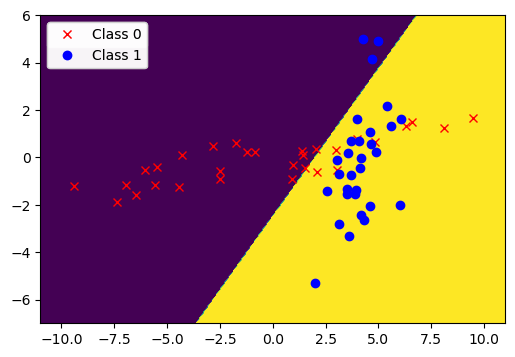

The training classification accuracy for degree = 1  is : 0.8
The testing classification accuracy for degree = 1  is : 0.77


[-0.35082056  0.10705408  0.02444723  0.00225307 -0.04160807  0.0613047 ]


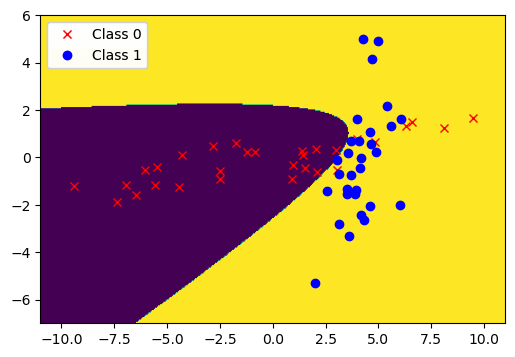

The training classification accuracy for degree = 2  is : 0.8833333333333333
The testing classification accuracy for degree = 2  is : 0.845


The training classification accuracy for degree = 3  is : 0.8833333333333333
The testing classification accuracy for degree = 3  is : 0.835




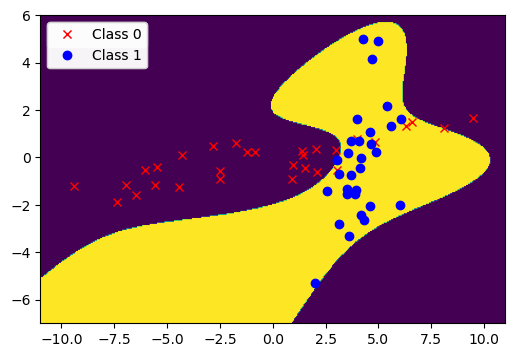

The training classification accuracy for degree = 4  is : 0.9
The testing classification accuracy for degree = 4  is : 0.815


The training classification accuracy for degree = 5  is : 0.9
The testing classification accuracy for degree = 5  is : 0.8


The training classification accuracy for degree = 6  is : 0.95
The testing classification accuracy for degree = 6  is : 0.795




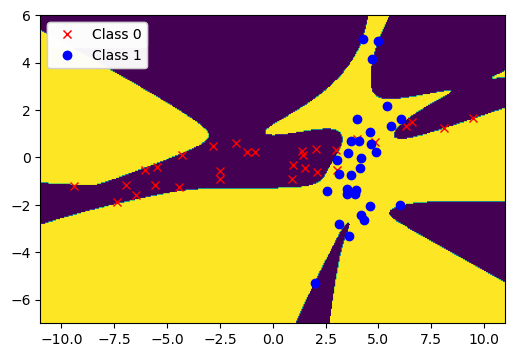

The training classification accuracy for degree = 7  is : 0.95
The testing classification accuracy for degree = 7  is : 0.715




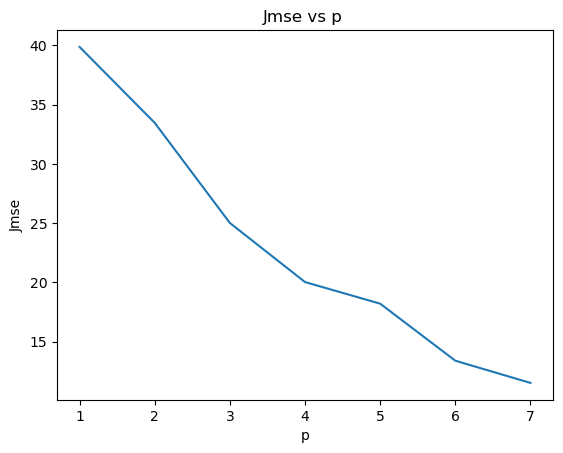

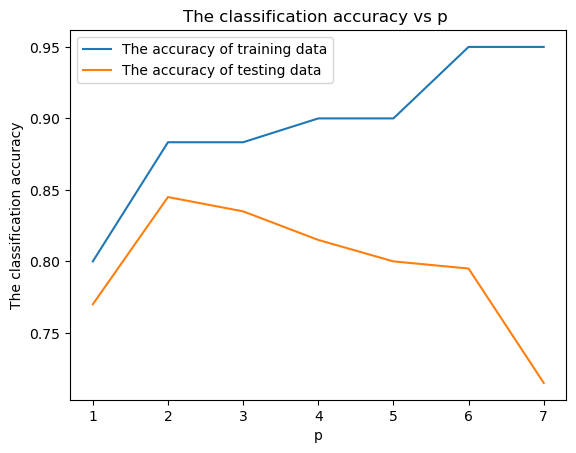

In [107]:
def MSE():
    Jmse = []
    train_acc = []
    test_acc = []
    
    for degree in range(1,8):
        poly = PolynomialFeatures(degree)
        xdata_poly = poly.fit_transform(xdata_train)
        xdata_poly_test = poly.fit_transform(xdata_test)
        
        N, D = xdata_poly.shape
        N_test, D_test = xdata_poly_test.shape

        reg = LinearRegression(fit_intercept=False).fit(xdata_poly, ydata_train)
        if(degree == 2):
            print(reg.coef_)
        
        if(degree in [1, 2, 4, 7]):
            plotDecBoundaries_Nonlinear(xdata_train, ydata_train, poly.fit_transform, reg.predict, fsize=(6,4),legend_on = True)
        
        predict_train = reg.predict(xdata_poly)
        predict_test = reg.predict(xdata_poly_test)
        if(degree == 2):
            print(predict_train)
        
        Jm = np.sum(np.square(predict_train - ydata_train))
        Jmse.append(Jm)
        
        correct_train = np.sum(predict_train * ydata_train > 0)
        correct_test = np.sum(predict_test * ydata_test > 0)
        
        train_acc.append(correct_train / N)
        test_acc.append(correct_test / N_test )
    
        print("The training classification accuracy for degree =", degree," is :",correct_train / N)
        print("The testing classification accuracy for degree =", degree," is :",correct_test / N_test)
        print("\n")
    degrees = np.arange(1, 8)
    plt.plot(degrees, Jmse)
    plt.title("Jmse vs p ")
    plt.xlabel("p")
    plt.ylabel("Jmse")
    plt.show()
                       
    plt.plot(degrees, train_acc, label="The accuracy of training data")
    plt.plot(degrees, test_acc, label="The accuracy of testing data")
    plt.legend()
    plt.xlabel("p")
    plt.ylabel("The classification accuracy")
    plt.title("The classification accuracy vs p ")
    plt.show()
    
                        
MSE()

The training classification accuracy for degree = 1 lambda = 0.3 is : 0.8
The testing classification accuracy for degree = 1 lambda = 0.3 is : 0.77




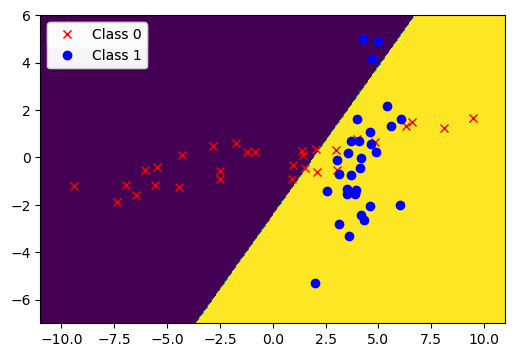

The training classification accuracy for degree = 1 lambda = 1 is : 0.8
The testing classification accuracy for degree = 1 lambda = 1 is : 0.78


The training classification accuracy for degree = 1 lambda = 3 is : 0.8
The testing classification accuracy for degree = 1 lambda = 3 is : 0.78




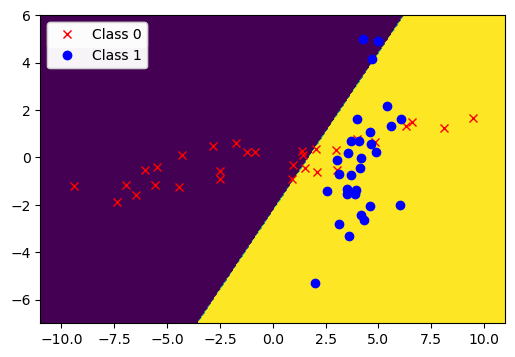

The training classification accuracy for degree = 1 lambda = 10 is : 0.7666666666666667
The testing classification accuracy for degree = 1 lambda = 10 is : 0.79


The training classification accuracy for degree = 1 lambda = 30 is : 0.7666666666666667
The testing classification accuracy for degree = 1 lambda = 30 is : 0.8




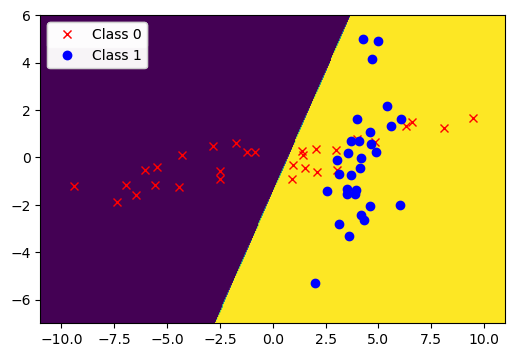

The training classification accuracy for degree = 1 lambda = 100 is : 0.75
The testing classification accuracy for degree = 1 lambda = 100 is : 0.765


The training classification accuracy for degree = 2 lambda = 0.3 is : 0.8833333333333333
The testing classification accuracy for degree = 2 lambda = 0.3 is : 0.85




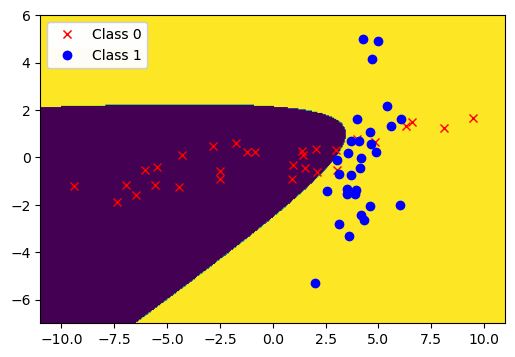

The training classification accuracy for degree = 2 lambda = 1 is : 0.8833333333333333
The testing classification accuracy for degree = 2 lambda = 1 is : 0.85


The training classification accuracy for degree = 2 lambda = 3 is : 0.8833333333333333
The testing classification accuracy for degree = 2 lambda = 3 is : 0.845




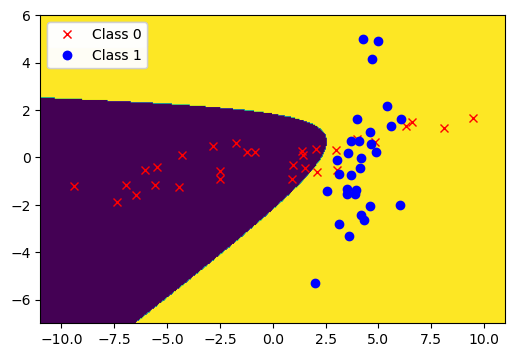

The training classification accuracy for degree = 2 lambda = 10 is : 0.85
The testing classification accuracy for degree = 2 lambda = 10 is : 0.825


The training classification accuracy for degree = 2 lambda = 30 is : 0.8
The testing classification accuracy for degree = 2 lambda = 30 is : 0.8




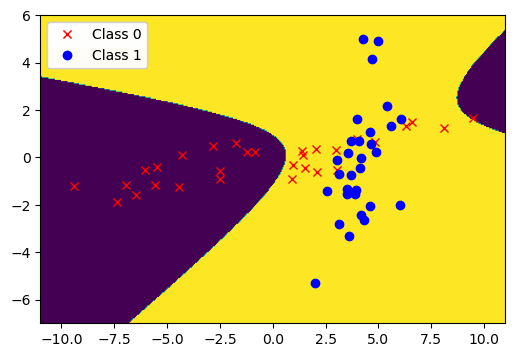

The training classification accuracy for degree = 2 lambda = 100 is : 0.7666666666666667
The testing classification accuracy for degree = 2 lambda = 100 is : 0.765


The training classification accuracy for degree = 3 lambda = 0.3 is : 0.8833333333333333
The testing classification accuracy for degree = 3 lambda = 0.3 is : 0.835


The training classification accuracy for degree = 3 lambda = 1 is : 0.8833333333333333
The testing classification accuracy for degree = 3 lambda = 1 is : 0.83


The training classification accuracy for degree = 3 lambda = 3 is : 0.8833333333333333
The testing classification accuracy for degree = 3 lambda = 3 is : 0.83


The training classification accuracy for degree = 3 lambda = 10 is : 0.85
The testing classification accuracy for degree = 3 lambda = 10 is : 0.81


The training classification accuracy for degree = 3 lambda = 30 is : 0.8166666666666667
The testing classification accuracy for degree = 3 lambda = 30 is : 0.79


The training classification accura

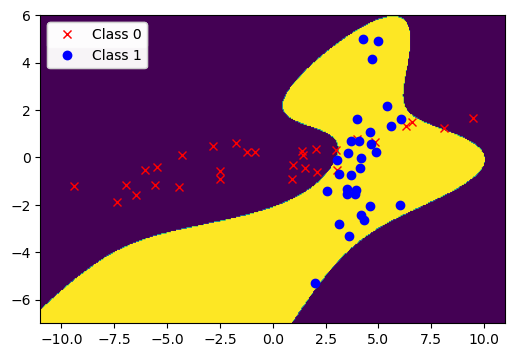

The training classification accuracy for degree = 4 lambda = 1 is : 0.9166666666666666
The testing classification accuracy for degree = 4 lambda = 1 is : 0.825


The training classification accuracy for degree = 4 lambda = 3 is : 0.9
The testing classification accuracy for degree = 4 lambda = 3 is : 0.835




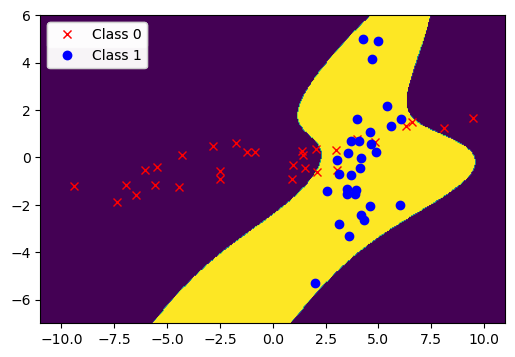

The training classification accuracy for degree = 4 lambda = 10 is : 0.8833333333333333
The testing classification accuracy for degree = 4 lambda = 10 is : 0.83


The training classification accuracy for degree = 4 lambda = 30 is : 0.8333333333333334
The testing classification accuracy for degree = 4 lambda = 30 is : 0.815




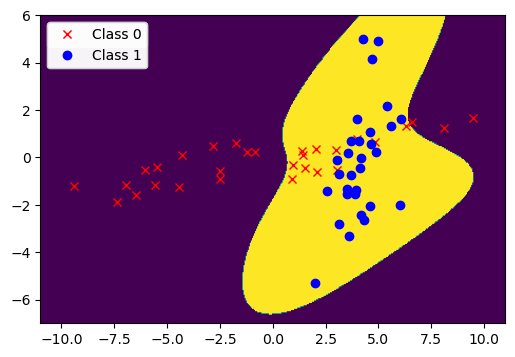

The training classification accuracy for degree = 4 lambda = 100 is : 0.8
The testing classification accuracy for degree = 4 lambda = 100 is : 0.775


The training classification accuracy for degree = 5 lambda = 0.3 is : 0.9
The testing classification accuracy for degree = 5 lambda = 0.3 is : 0.805


The training classification accuracy for degree = 5 lambda = 1 is : 0.9
The testing classification accuracy for degree = 5 lambda = 1 is : 0.82


The training classification accuracy for degree = 5 lambda = 3 is : 0.9
The testing classification accuracy for degree = 5 lambda = 3 is : 0.81


The training classification accuracy for degree = 5 lambda = 10 is : 0.9
The testing classification accuracy for degree = 5 lambda = 10 is : 0.81


The training classification accuracy for degree = 5 lambda = 30 is : 0.8666666666666667
The testing classification accuracy for degree = 5 lambda = 30 is : 0.795


The training classification accuracy for degree = 5 lambda = 100 is : 0.8
The testing classifi

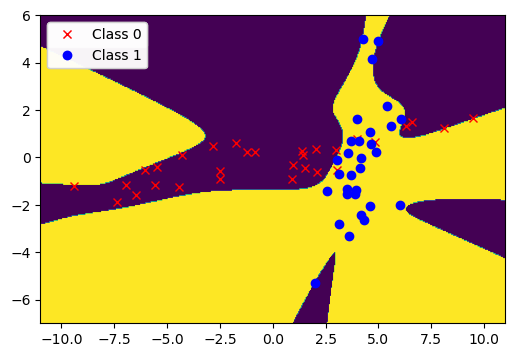

The training classification accuracy for degree = 7 lambda = 1 is : 0.95
The testing classification accuracy for degree = 7 lambda = 1 is : 0.76


The training classification accuracy for degree = 7 lambda = 3 is : 0.95
The testing classification accuracy for degree = 7 lambda = 3 is : 0.78




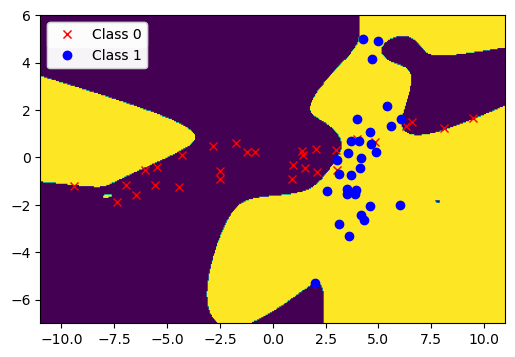

The training classification accuracy for degree = 7 lambda = 10 is : 0.95
The testing classification accuracy for degree = 7 lambda = 10 is : 0.82


The training classification accuracy for degree = 7 lambda = 30 is : 0.95
The testing classification accuracy for degree = 7 lambda = 30 is : 0.815




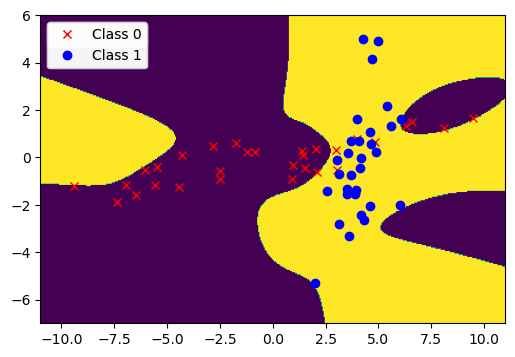

The training classification accuracy for degree = 7 lambda = 100 is : 0.9333333333333333
The testing classification accuracy for degree = 7 lambda = 100 is : 0.825




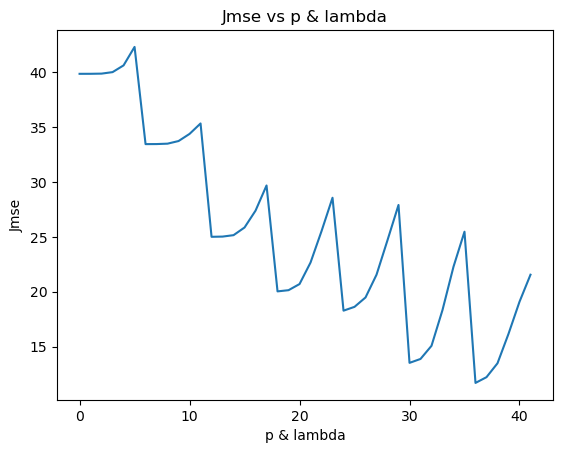

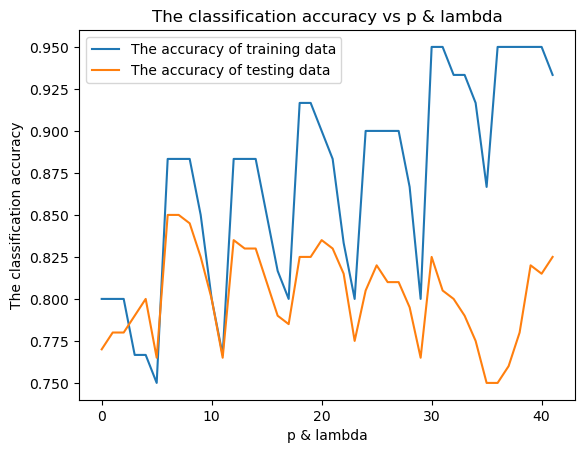

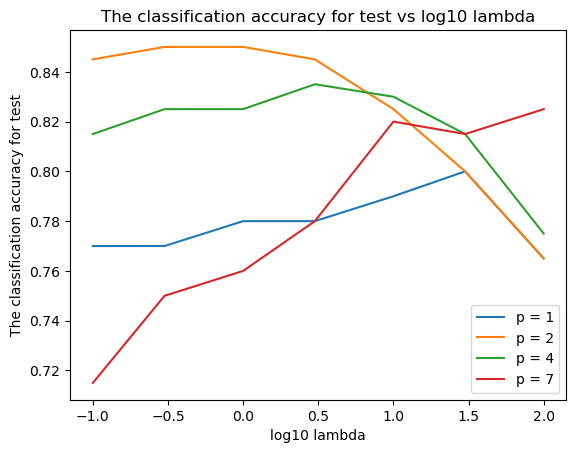

In [103]:
def MSE_reg():
    Jmse = []
    train_acc = []
    test_acc = []
    test_acc_log = []
    log_lam = [-1]
    
    test_acc_log.append([0.77])
    test_acc_log.append([0.845])
    test_acc_log.append([0.815])
    test_acc_log.append([0.715])
    idx = 0
    
    for degree in range(1,8):
        poly = PolynomialFeatures(degree)
        xdata_poly = poly.fit_transform(xdata_train)
        xdata_poly_test = poly.fit_transform(xdata_test)
        
        N, D = xdata_poly.shape
        N_test, D_test = xdata_poly_test.shape
        
        temp_test = []
        if(degree in [1, 2, 4, 7]):
            temp_test = test_acc_log[idx]
            idx += 1
        
        for lam in [0.3, 1, 3, 10, 30, 100]:
            reg = Ridge(alpha=lam, fit_intercept = False).fit(xdata_poly, ydata_train)
#         reg = LinearRegression(fit_intercept=True).fit(xdata_poly, ydata_train)
        
            if(degree == 1):
                log_lam.append(np.log10(lam))
        
            if(degree in [1, 2, 4, 7] and lam in [1,10,100]):
                plotDecBoundaries_Nonlinear(xdata_train, ydata_train, poly.fit_transform, reg.predict, fsize=(6,4),legend_on = True)

            predict_train = reg.predict(xdata_poly)
            predict_test = reg.predict(xdata_poly_test)

            Jm = np.sum(np.square(predict_train - ydata_train))
            Jmse.append(Jm)

            correct_train = np.sum(predict_train * ydata_train > 0)
            correct_test = np.sum(predict_test * ydata_test > 0)
            
            temp_test.append(correct_test / N_test)
            train_acc.append(correct_train / N)
            test_acc.append(correct_test / N_test )

            print("The training classification accuracy for degree =", degree,"lambda =", lam, "is :",correct_train / N)
            print("The testing classification accuracy for degree =", degree,"lambda =", lam, "is :",correct_test / N_test)
            print("\n")
            
#         if(degree in [1, 2, 4, 7]):
#             test_acc_log.append(temp_test)
    
    degrees = np.arange(len(Jmse))
    plt.plot(degrees, Jmse)
    plt.xlabel("p & lambda")
    plt.ylabel("Jmse")
    plt.title("Jmse vs p & lambda")
    plt.show()
                       
    plt.plot(degrees, train_acc, label="The accuracy of training data")
    plt.plot(degrees, test_acc, label="The accuracy of testing data")
    plt.legend()
    plt.xlabel("p & lambda")
    plt.ylabel("The classification accuracy")
    plt.title("The classification accuracy vs p & lambda")
    plt.show()
    
    plt.plot(log_lam, test_acc_log[0], label="p = 1")
    plt.plot(log_lam, test_acc_log[1], label="p = 2")
    plt.plot(log_lam, test_acc_log[2], label="p = 4")
    plt.plot(log_lam, test_acc_log[3], label="p = 7")
    plt.legend()
    plt.xlabel("log10 lambda")
    plt.ylabel("The classification accuracy for test")
    plt.title("The classification accuracy for test vs log10 lambda")
    plt.show()
    
                        
MSE_reg()